In [14]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

data_file_path = r"C:\Users\rysad\OneDrive\Desktop\Data Science\DM-1\Grocery_Items_34.csv"


df_transactions = pd.read_csv(data_file_path)

transactions_list = []
for _, row in df_transactions.iterrows():
    transactions_list.append([item for item in row if pd.notna(item)])

encoder = TransactionEncoder()
transaction_array = encoder.fit(transactions_list).transform(transactions_list)
df_encoded_transactions = pd.DataFrame(transaction_array, columns=encoder.columns_)

min_support_threshold = 0.01

frequent_itemsets_result = apriori(df_encoded_transactions, min_support=min_support_threshold, use_colnames=True)

min_confidence_threshold = 0.1

association_rules_result = association_rules(frequent_itemsets_result, metric='confidence', min_threshold=min_confidence_threshold)

print("\nAssociation Rules:")
print(association_rules_result)



Association Rules:
          antecedents   consequents  antecedent support  consequent support  \
0  (other vegetables)  (whole milk)            0.120500             0.15725   
1        (rolls/buns)  (whole milk)            0.108000             0.15725   
2              (soda)  (whole milk)            0.096000             0.15725   
3            (yogurt)  (whole milk)            0.085375             0.15725   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.014625    0.121369  0.771824 -0.004324    0.959163      -0.251574  
1  0.013625    0.126157  0.802273 -0.003358    0.964419      -0.216485  
2  0.010500    0.109375  0.695548 -0.004596    0.946246      -0.326235  
3  0.012875    0.150805  0.959016 -0.000550    0.992411      -0.044639  


Minimum Support Value: 0.001, Minimum Confidence Threshold: 0.05
Number of Association Rules: 492
===
Minimum Support Value: 0.001, Minimum Confidence Threshold: 0.075
Number of Association Rules: 276
===
Minimum Support Value: 0.001, Minimum Confidence Threshold: 0.1
Number of Association Rules: 151
===
Minimum Support Value: 0.005, Minimum Confidence Threshold: 0.05
Number of Association Rules: 57
===
Minimum Support Value: 0.005, Minimum Confidence Threshold: 0.075
Number of Association Rules: 38
===
Minimum Support Value: 0.005, Minimum Confidence Threshold: 0.1
Number of Association Rules: 23
===
Minimum Support Value: 0.01, Minimum Confidence Threshold: 0.05
Number of Association Rules: 8
===
Minimum Support Value: 0.01, Minimum Confidence Threshold: 0.075
Number of Association Rules: 7
===
Minimum Support Value: 0.01, Minimum Confidence Threshold: 0.1
Number of Association Rules: 4
===


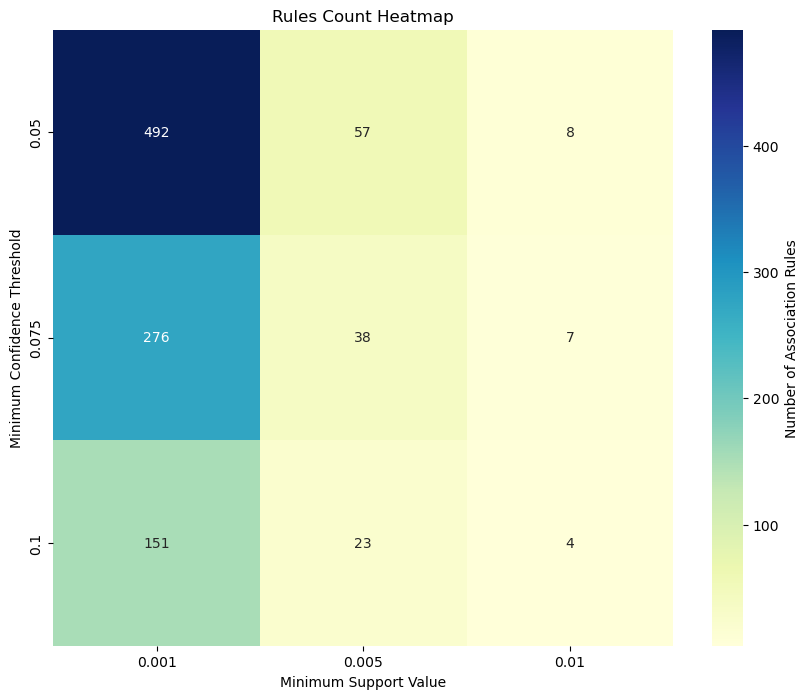

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

min_support_values = [0.001, 0.005, 0.01]
min_confidence_thresholds = [0.05, 0.075, 0.1]

count_results = []

for minimum_support in min_support_values:
    for minimum_confidence in min_confidence_thresholds:
    
        frequent_itemsets = apriori(df_encoded_transactions, min_support=minimum_support, use_colnames=True)
       
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minimum_confidence)
  
        num_rules = len(rules)
        
        count_results.append({
            'Minimum Support Value': minimum_support,
            'Minimum Confidence Threshold': minimum_confidence,
            'Count': num_rules
        })
        
        print(f"Minimum Support Value: {minimum_support}, Minimum Confidence Threshold: {minimum_confidence}")
        print(f"Number of Association Rules: {num_rules}")
        print("===")


count_df = pd.DataFrame(count_results)

heatmap_data = count_df.pivot_table(
    index="Minimum Confidence Threshold",
    columns="Minimum Support Value",
    values="Count"
)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Association Rules'})
plt.title("Rules Count Heatmap")
plt.xlabel("Minimum Support Value")
plt.ylabel("Minimum Confidence Threshold")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

df_subset1, df_subset2 = train_test_split(df_encoded_transactions, test_size=0.5, random_state=42)

min_support_subset = 0.005
min_confidence_subset = 0.075

def extract_association_rules(subset):
    frequent_itemsets = apriori(subset, min_support=min_support_subset, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_subset)
    return rules

rules_subset1 = extract_association_rules(df_subset1)
print("Association Rules for Subset 1:")
print(rules_subset1)

rules_subset2 = extract_association_rules(df_subset2)
print("\nAssociation Rules for Subset 2:")
print(rules_subset2)

common_rules = set(rules_subset1.index).intersection(set(rules_subset2.index))

print("\nCommon Association Rules:")
if common_rules:
    for rule_index in common_rules:
        print(rule_index)
else:
    print("No common association rules between the subsets.")


Association Rules for Subset 1:
           antecedents         consequents  antecedent support  \
0       (bottled beer)        (whole milk)             0.04600   
1      (bottled water)        (rolls/buns)             0.05975   
2      (bottled water)              (soda)             0.05975   
3      (bottled water)        (whole milk)             0.05975   
4        (canned beer)  (other vegetables)             0.04600   
5        (canned beer)        (whole milk)             0.04600   
6       (citrus fruit)        (rolls/buns)             0.05325   
7       (citrus fruit)        (whole milk)             0.05325   
8          (pip fruit)  (other vegetables)             0.04800   
9         (rolls/buns)  (other vegetables)             0.10725   
10           (sausage)  (other vegetables)             0.06000   
11     (shopping bags)  (other vegetables)             0.04900   
12              (soda)  (other vegetables)             0.10050   
13  (other vegetables)              (soda)  

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 31752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │       508,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 508,340 (1.94 MB)

 Trainable params: 508,340 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.3059 - loss: 1.5150 - val_accuracy: 0.3506 - val_loss: 1.2966
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4462 - loss: 1.1769 - val_accuracy: 0.5057 - val_loss: 1.1200
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6597 - loss: 0.8916 - val_accuracy: 0.6609 - val_loss: 1.0005
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8143 - loss: 0.6012 - val_accuracy: 0.6782 - val_loss: 0.9193
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8761 - loss: 0.4247 - val_accuracy: 0.6437 - val_loss: 0.8959
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9252 - loss: 0.3396 - val_accuracy: 0.6494 - val_loss: 0.9333
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9673 - loss: 0.2429 - val_accuracy: 0.6552 - val_loss: 1.0046
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9632 - loss: 0.1961 - val_accuracy: 0.6839 - v

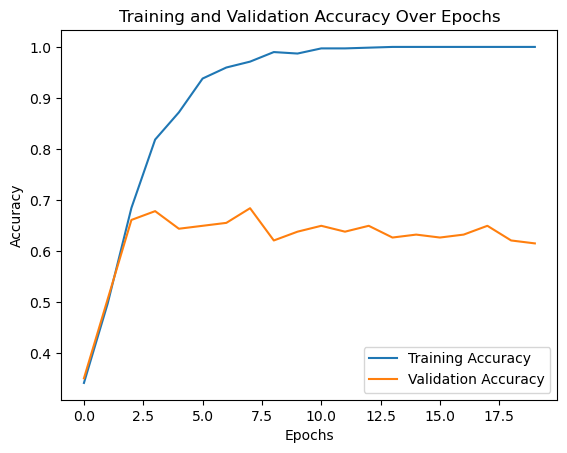

In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

dataset_path = r'C:\Users\rysad\OneDrive\Desktop\Data Science\DM-1\datasets\ResizedImages'

def load_images_and_labels(directory):
    image_data = []
    label_data = []
    label_mapping = {
        'n02088094-Afghan_hound': 0,
        'n02088466-bloodhound': 1,
        'n02098413-Lhasa': 2,
        'n02107312-miniature_pinscher': 3
    }
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path) and folder_name in label_mapping:
            label = folder_name
            encoded_label = label_mapping[label]
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (128, 128))  
                img = img / 255.0  
                image_data.append(img)
                label_data.append(encoded_label)
    return np.array(image_data), np.array(label_data)

images_data, labels_data = load_images_and_labels(dataset_path)

categorical_labels = to_categorical(labels_data, num_classes=4)

X_train_data, X_val_data, y_train_labels, y_val_labels = train_test_split(images_data, categorical_labels, test_size=0.2, random_state=42)

input_shape = (128, 128, 3)
model_classifier = Sequential()
model_classifier.add(Input(shape=input_shape))  
model_classifier.add(Conv2D(8, (3, 3), activation='relu'))
model_classifier.add(MaxPooling2D(pool_size=(2, 2)))
model_classifier.add(Flatten())
model_classifier.add(Dense(16, activation='relu'))
model_classifier.add(Dense(4, activation='softmax'))

model_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_classifier.summary()

batch_size_train = 32
epochs_train = 20
history_train = model_classifier.fit(X_train_data, y_train_labels, batch_size=batch_size_train, epochs=epochs_train, validation_data=(X_val_data, y_val_labels))

plt.plot(history_train.history['accuracy'], label='Training Accuracy')
plt.plot(history_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


From the above graph Training Accuracy is greater than Validation Accuracy. Hence, the model is "Overfitting".  

C:\Users\rysad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.2887 - loss: 1.9842 - val_accuracy: 0.3333 - val_loss: 1.3636
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3631 - loss: 1.3043 - val_accuracy: 0.3218 - val_loss: 1.3008
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4254 - loss: 1.2091 - val_accuracy: 0.4540 - val_loss: 1.2243
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5547 - loss: 1.0973 - val_accuracy: 0.4540 - val_loss: 1.1967
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5449 - loss: 1.0144 - val_accuracy: 0.5000 - val_loss: 1.1587
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5910 - loss: 0.9253 - val_accuracy: 0.4655 - val_loss: 1.1643
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6369 - loss: 0.8462 - val_accuracy: 0.4885 - val_loss: 1.1223
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6285 - loss: 0.7932 - val_accuracy: 0.5000 - v

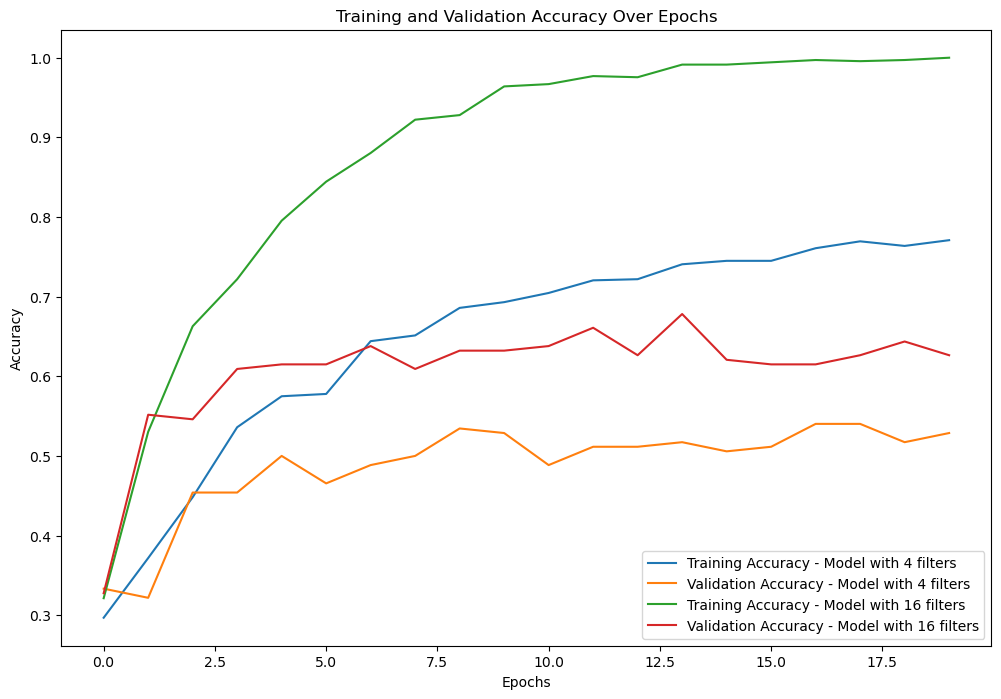

In [19]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
dataset_path = r'C:\Users\rysad\OneDrive\Desktop\Data Science\DM-1\datasets\ResizedImages'
images_data, labels_data = load_images_and_labels(dataset_path)
categorical_labels = to_categorical(labels_data, num_classes=4)
X_train_data, X_val_data, y_train_labels, y_val_labels = train_test_split(images_data, categorical_labels, test_size=0.2, random_state=42)
def create_cnn_model(filters):
    model = Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
filters_values = [4, 16]
models = []
histories = []

for filters in filters_values:
    model = create_cnn_model(filters)
    models.append(model)
    history = model.fit(X_train_data, y_train_labels, batch_size=batch_size_train, epochs=epochs_train,
                        validation_data=(X_val_data, y_val_labels))
    histories.append(history)
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    label = f'Model with {filters_values[i]} filters'
    plt.plot(history.history['accuracy'], label=f'Training Accuracy - {label}')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy - {label}')

plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4070 - loss: 1.3266 - val_accuracy: 0.5345 - val_loss: 1.2224
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6161 - loss: 0.9784 - val_accuracy: 0.5632 - val_loss: 1.1684
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6946 - loss: 0.8657 - val_accuracy: 0.5747 - val_loss: 1.1282
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7023 - loss: 0.8038 - val_accuracy: 0.5920 - val_loss: 1.1042
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7907 - loss: 0.6608 - val_accuracy: 0.5920 - val_loss: 1.0783
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8488 - loss: 0.5508 - val_accuracy: 0.6207 - val_loss: 1.0095
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8582 - loss: 0.4756 - val_accuracy: 0.5805 - val_loss: 1.0326
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8839 - loss: 0.4194 - val_accuracy: 0.6494 - v

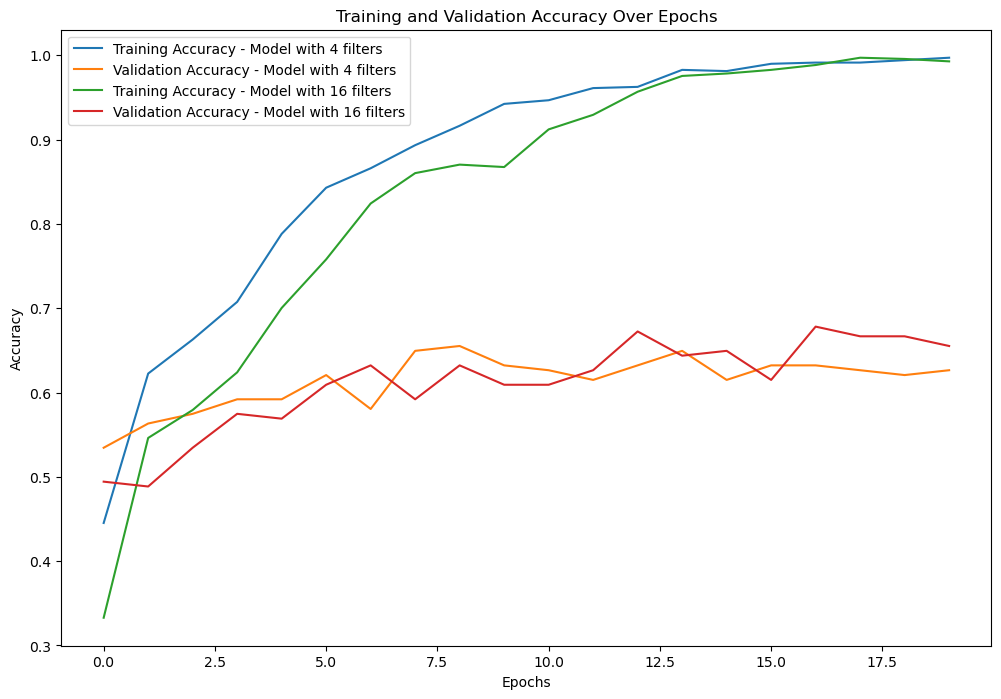

In [21]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
dataset_path = r'C:\Users\rysad\OneDrive\Desktop\Data Science\DM-1\datasets\ResizedImages'
images_data, labels_data = load_images_and_labels(dataset_path)
categorical_labels = to_categorical(labels_data, num_classes=4)
X_train_data, X_val_data, y_train_labels, y_val_labels = train_test_split(images_data, categorical_labels, test_size=0.2, random_state=42)
def create_cnn_model(filters):
    model = Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
filters_values = [4, 16]
models = []
histories = []

for filters in filters_values:
    model = create_cnn_model(filters)
    models.append(model)
    history = model.fit(X_train_data, y_train_labels, batch_size=batch_size_train, epochs=epochs_train,
                        validation_data=(X_val_data, y_val_labels))
    histories.append(history)
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    label = f'Model with {filters_values[i]} filters'
    plt.plot(history.history['accuracy'], label=f'Training Accuracy - {label}')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy - {label}')

plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Banner Id: 916461805
b)  Train the CNN using 2 other number of filters: 4 and 16 for the convolution layer (i) with all other parameters unchanged

For the model with 4 Filters, the Training Accuracy is greater than validation Accuracy. Hence, the model is "Overfitting".

Similarly for the model with 16 Filters, the Training Accuracy is greater than Validation Accuracy too. Hence this model is also "Overfitting".